### IDs:
Insert yours IDs to the cell below

ID #1: 203972922

ID #2: 201312907 


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

## Imports

In [103]:
! pip install tabulate
! pip install seaborn
#!{sys.executable} -m pip install scipy

import pandas as pd
import numpy as np
np.random.seed(0)  # for consistency in different experiments !
import matplotlib.pyplot as plt
import math
import scipy
from scipy.stats import binom
import sys
import pandas as pd
from scipy.stats import moment
from scipy.stats import iqr as scipy_iqr
import seaborn as sns
from scipy.stats import nbinom

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

###  Answer:

* we want to calculate the number of samples N.
* we will derive N by analyzing the $ P_{at-least-1-defect} $

<br> $$ P_{at-least-1-defect} = 1- P_{all-not-defect} = 1- P_({not-defect})^N $$<br>

<br> $$  P_{not-defect}^N = 1-P_{at-least-1-defect} $$<br>

<br> $$ log_{not-defect}(1-P_{at-least-1-defect}) = N $$<br>

In [104]:
# we want to define new randum variable as the sum of N variable and use the fact that they are independent
def calculate_the_amount_of_independent_samples_2_get_almost_one_defect(goal_probability, defect_prob):
    prob_2_not_achieve_defect = 1-goal_probability
    non_defect_prob = 1-defect_prob
    amount_of_independent_samples = int(math.ceil((math.log(prob_2_not_achieve_defect, non_defect_prob))))
    print('The amount of independent samples is '+ str(amount_of_independent_samples))

In [105]:
# initial info 
defect_prob = 0.03
goal_probability = 0.85
min_amount_of_defect = 1

calculate_the_amount_of_independent_samples_2_get_almost_one_defect(goal_probability, defect_prob)

The amount of independent samples is 63


## The sums of independent variable set as:



#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [106]:
# initial info 
defect_prob = 0.04
goal_probability = 0.95
min_amount_of_defect = 1
calculate_the_amount_of_independent_samples_2_get_almost_one_defect(goal_probability, defect_prob)


The amount of independent samples is 74


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [107]:
def evaluate_the_amount_of_independent_samples_2_get_almost_k_defects(desire_amount_of_defect, defect_prob, goal_probability):
    # reset amount independet variables
    num_of_samples = 1
    list_of_probability = []
    list_of_amount_of_independent_sampels = []
    while True:
        
        p = 1 - sum([binom.pmf(number_of_defects, num_of_samples, defect_prob) for number_of_defects in range(desire_amount_of_defect)])
        
        # vallidate if achieve the desire prob'
        list_of_probability.append(p)
        list_of_amount_of_independent_sampels.append(num_of_samples)
        if p >= goal_probability:
            break
        else:
            # increase the amout of sampels
            num_of_samples+=1
            continue
    print('The amount of independent samples is ' + str(num_of_samples))
    print('Mean of list_of_probability is ' + str(np.mean(list_of_probability)))
    print('Variance of list_of_probability is ' + str(np.var(list_of_probability)))
    print('Mean of list_of_amount_of_independent_sampels is ' + str(np.mean(list_of_amount_of_independent_sampels)))
    print('Variance of list_of_amount_of_independent_sampels is ' + str(np.var(list_of_amount_of_independent_sampels)))
    return list_of_probability, list_of_amount_of_independent_sampels


### First  Case:
* Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch

In [108]:
defect_prob = 0.1
goal_probability = 0.9
desire_amount_of_defect = 5    
y1,x1 = evaluate_the_amount_of_independent_samples_2_get_almost_k_defects(desire_amount_of_defect, defect_prob,goal_probability)

The amount of independent samples is 78
Mean of list_of_probability is 0.39047347957255407
Variance of list_of_probability is 0.1061167973596451
Mean of list_of_amount_of_independent_sampels is 39.5
Variance of list_of_amount_of_independent_sampels is 506.9166666666667


### Second  Case:
* Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch

In [109]:
defect_prob = 0.3
goal_probability = 0.9
desire_amount_of_defect = 15
y2,x2 = evaluate_the_amount_of_independent_samples_2_get_almost_k_defects(desire_amount_of_defect, defect_prob,goal_probability)

The amount of independent samples is 64
Mean of list_of_probability is 0.24370052041879908
Variance of list_of_probability is 0.09881575611289588
Mean of list_of_amount_of_independent_sampels is 32.5
Variance of list_of_amount_of_independent_sampels is 341.25


Text(0.5, 1.0, 'The amount of sampels as function of the probability')

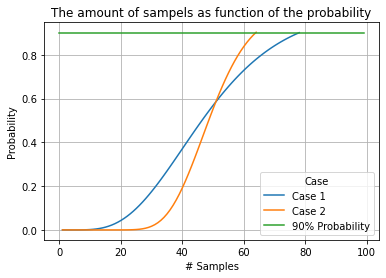

In [110]:
data_df = pd.DataFrame()
data_df['Probability'] =y1
data_df['# Samples'] =x1
data_df['Case'] ='Case 1'
data_df2 = pd.DataFrame()
data_df2['Probability'] =y2
data_df2['# Samples'] = x2
data_df2['Case'] ='Case 2'
data_df3 = pd.DataFrame()
data_df3['Probability'] =100*[0.9]
data_df3['# Samples'] = np.arange(0,100)
data_df3['Case'] = '90% Probability'
data_df = pd.concat([data_df, data_df2, data_df3])

sns.lineplot(data=data_df, x="# Samples", y="Probability", hue="Case")
plt.grid()
plt.title('The amount of sampels as function of the probability')

### Comparing the 2 cases 

another approach for plotting the comparison:

Case1 var 450.0
Case2 var 116.66666666666667


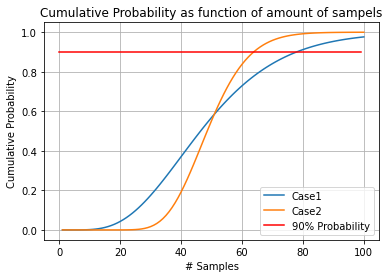

In [111]:

Case1 = nbinom(5, 0.1, loc=5)
Case2 = nbinom(15, 0.3, loc=15)

print(f'Case1 var {Case1.var()}')
print(f'Case2 var {Case2.var()}')

number_of_samples = range(1,101)

Case1_cdf_values = [Case1.cdf(num) for num in number_of_samples]
Case2_cdf_values = [Case2.cdf(num) for num in number_of_samples]

plt.figure()
plt.plot(number_of_samples, Case1_cdf_values, label='Case1')
plt.plot(number_of_samples, Case2_cdf_values, label='Case2')
plt.plot(np.arange(0,100),100*[0.9] , 'r', label='90% Probability')
plt.title('Cumulative Probability as function of amount of sampels')
plt.ylabel('Cumulative Probability')
plt.xlabel('# Samples')
plt.legend()
plt.grid()
plt.show()

## Explanation 
* the difference between the two results are:
    * we can see that "case2" reaches probability 0.9 faster than "case1", i.e, in "case1" we need less samples to get to 90% probability. 
    * this is counter intuitive becuase the defect rate and the number of defects are both multiplied by 3.
    * the reason this happens is becuase of the variance: "case2" has a smaller variance, and so we can see that the incline starts later than "case1" but it is steeper than "case1"

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

### Scenario1: case of SH

number of samples in rent_prices_SH is 16000
mean of rent_prices_SH is 6280
median of rent_prices_SH is 4300
Interquartile Range (IQR) of rent_prices_SH is 5350


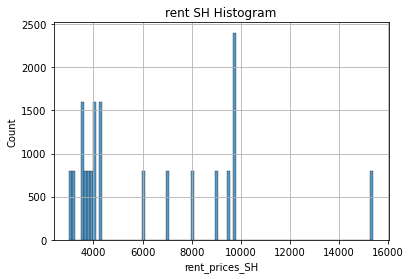

In [112]:
population_SH = 16000
mean_SH = 6300
median_rent = 4600
bins_size = 100 # needs to verify that there are at least 10 non zeros points
rent_prices_SH = [3000,3200,3500,3600,3700,3800,3900,4000,4100,4300,
                  4300,6000,7000,8000,9000,9500,9700,9800,9800,15400] * int(population_SH / 20)

print(f'number of samples in rent_prices_SH is {int(len(rent_prices_SH))}')
print(f'mean of rent_prices_SH is {int(np.mean(rent_prices_SH))}')
print(f'median of rent_prices_SH is {int(np.median(rent_prices_SH))}')
print(f'Interquartile Range (IQR) of rent_prices_SH is {int(scipy_iqr(rent_prices_SH))}')

rent_prices_SH_df = pd.DataFrame(rent_prices_SH, columns = ['rent_prices_SH'])
sns.histplot(data=rent_prices_SH_df , x='rent_prices_SH', bins=bins_size)
plt.title('rent SH Histogram');
plt.grid()

### Scenario1: case of RG

number of samples in rent_prices_RG is 22000
mean of rent_prices_RG is 4200
median of rent_prices_RG is 4600
Interquartile Range (IQR) of rent_prices_RG is 6050


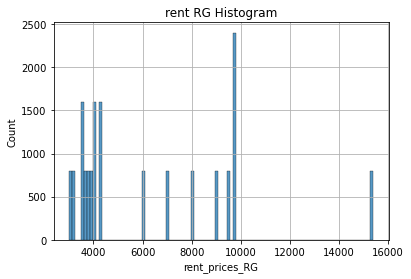

In [113]:
population_RG = 22000
mean_RG = 4200
median_rent = 4600
bins_size = 100 # needs to verify that there are at least 10 non zeros points
rent_prices_RG = [100 , 200, 300, 400,500,1000,4000,4200,4400,4600,
                  4600,4800,5500,6000,6900,7000,7200,7300,7400,7600] * int(population_RG / 20)

print(f'number of samples in rent_prices_RG is {int(len(rent_prices_RG))}')
print(f'mean of rent_prices_RG is {int(np.mean(rent_prices_RG))}')
print(f'median of rent_prices_RG is {int(np.median(rent_prices_RG))}')
print(f'Interquartile Range (IQR) of rent_prices_RG is {int(scipy_iqr(rent_prices_RG))}')

rent_prices_RG_df= pd.DataFrame(rent_prices_SH, columns = ['rent_prices_RG'])
sns.histplot(data=rent_prices_RG_df, x='rent_prices_RG', bins=bins_size)
plt.title('rent RG Histogram');
plt.grid()



### Scenario2: case of SH

number of samples in rent_prices_SH is 16000
mean of rent_prices_SH is 6300
median of rent_prices_SH is 4300
Interquartile Range (IQR) of rent_prices_SH is 5350


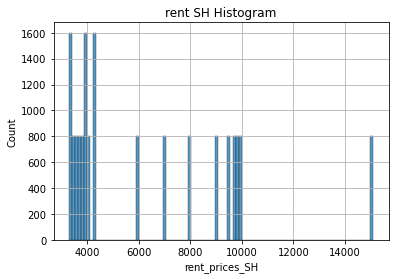

In [114]:
population_SH = 16000
mean_SH = 6300
median_rent = 4600
bins_size = 100 # needs to verify that there are at least 10 non zeros points
rent_prices_SH = [3300,3400,3500,3600,3700,3800,3900,4000,4100,4300,
                  4300,6000,7000,8000,9000,9500,9700,9800,10000,15100] * int(population_SH / 20)

print(f'number of samples in rent_prices_SH is {int(len(rent_prices_SH))}')
print(f'mean of rent_prices_SH is {int(np.mean(rent_prices_SH))}')
print(f'median of rent_prices_SH is {int(np.median(rent_prices_SH))}')
print(f'Interquartile Range (IQR) of rent_prices_SH is {int(scipy_iqr(rent_prices_SH))}')

rent_prices_SH_df = pd.DataFrame(rent_prices_SH, columns = ['rent_prices_SH'])
sns.histplot(data=rent_prices_SH_df , x='rent_prices_SH', bins=bins_size)
plt.title('rent SH Histogram');
plt.grid()

### Scenario2: case of RG

number of samples in rent_prices_RG is 22000
mean of rent_prices_RG is 4200
median of rent_prices_RG is 4600
Interquartile Range (IQR) of rent_prices_RG is 6350


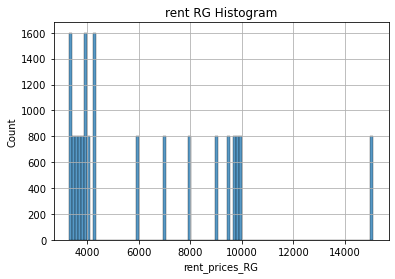

In [115]:
population_RG = 22000
mean_RG = 4200
median_rent = 4600
bins_size = 100 # needs to verify that there are at least 10 non zeros points
rent_prices_RG = [100 , 200, 300, 400,500,600,4000,4200,4400,4600,
                  4600,4800,5500,6000,6900,7000,7200,7300,7400,8000] * int(population_RG / 20)

print(f'number of samples in rent_prices_RG is {int(len(rent_prices_RG))}')
print(f'mean of rent_prices_RG is {int(np.mean(rent_prices_RG))}')
print(f'median of rent_prices_RG is {int(np.median(rent_prices_RG))}')
print(f'Interquartile Range (IQR) of rent_prices_RG is {int(scipy_iqr(rent_prices_RG))}')

rent_prices_RG_df= pd.DataFrame(rent_prices_SH, columns = ['rent_prices_RG'])
sns.histplot(data=rent_prices_RG_df, x='rent_prices_RG', bins=bins_size)
plt.title('rent RG Histogram');
plt.grid()


#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

### Scenario3: BOTH cases

Note that the variance of rent SH variance is 10562100
Note that the variance of rent RG variance is 7662725
Therfore the SH variance is bigger than RG variance


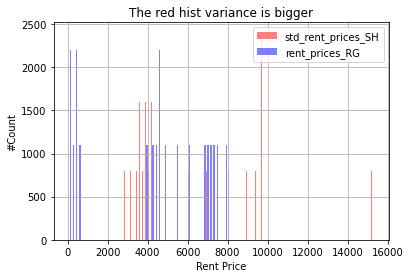

In [116]:
rent_prices_SH = [2900,3200,3500,3600,3700,3800,3900,4000,4100,4300,
                  4300,6000,7000,8000,9000,9500,9700,9800,9800,15300] * int(population_SH / 20)
rent_prices_RG = [50 , 200, 300, 400,500,600,4000,4200,4400,4600,
                  4600,4800,5500,6000,6900,7000,7200,7300,7400,7950] * int(population_RG / 20)
#
plt.hist([rent_prices_SH,rent_prices_RG], color=['r','b'],label = ['std_rent_prices_SH','rent_prices_RG'] ,alpha=0.5, bins = bins_size)
plt.grid()
plt.title('The red hist variance is bigger')
plt.xlabel('Rent Price')
plt.ylabel('#Count')
plt.legend()

std_rent_prices_RG = np.std(rent_prices_RG)
std_rent_prices_SH = np.std(rent_prices_SH)
var_rent_prices_SH = std_rent_prices_SH**2
var_rent_prices_RG= std_rent_prices_RG**2

string = 'Note that the variance of rent SH variance is ' + str(int(var_rent_prices_SH)) + '\n'
string += 'Note that the variance of rent RG variance is ' + str(int(var_rent_prices_RG))+ '\n'
string += 'Therfore the SH variance is bigger than RG variance'

print(string)


The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [117]:
PHI_values_RG = [3500, 3600, 3700, 3800, 3900, 4000, 7400, 7600, 7800, 8000, 
                 8000, 8200, 8900, 9400, 10300, 10400, 11000, 12000, 15000, 23500] * int(population_RG / 20)

print(f'number of samples in PHI_values_RG is {int(len(PHI_values_RG))}')
print(f'mean of PHI_values_RG is {int(np.mean(PHI_values_RG))}')
print(f'median of PHI_values_RG is {int(np.median(PHI_values_RG))}')

number of samples in PHI_values_RG is 22000
mean of PHI_values_RG is 8500
median of PHI_values_RG is 8000


In [118]:
PHI_values_SH =  [1000,2000,5100,11300,11400,11500,11600,11700,11800,12000,
                  12000,13700,14700,15700,16700,17200,17400,17500,17700,18000] * int(population_SH / 20)

print(f'number of samples in PHI_values_SH is {int(len(PHI_values_SH))}')
print(f'mean of PHI_values_SH is {int(np.mean(PHI_values_SH))}')
print(f'median of PHI_values_SH is {int(np.median(PHI_values_SH))}')

number of samples in PHI_values_SH is 16000
mean of PHI_values_SH is 12500
median of PHI_values_SH is 12000


In [119]:
rent_prices_SH = [200,300,400,6000,11400,11500,11600,11700,11800,12000,
                  12000,13700,14700,15700,16700,17200,17400,17500,17600,17700] * int(population_SH / 20)

rent_prices_RG = [10 , 100, 300, 400,500,600,4000,4200,4400,4600,
                  4600,4800,5500,5600,6900,7200,7200,7300,8000,9100] * int(population_RG / 20)

wanted_alpha_SH = 0.97
wanted_alpha_RG = 0.89

std_PHI_prices_SH = np.std(PHI_values_SH)
std_rent_prices_SH = np.std(rent_prices_SH)
cov_SH_matrix = np.cov(PHI_values_SH, rent_prices_SH)
cov_SH = cov_SH_matrix[0][1]
calculated_alpha_SH = (cov_SH)/(std_PHI_prices_SH*std_rent_prices_SH)
print(f'Comparing for SH: wanted alpha {wanted_alpha_SH} calculated alpha {calculated_alpha_SH}')

std_PHI_values_RG = np.std(PHI_values_RG)
std_rent_prices_RG = np.std(rent_prices_RG)
cov_RG_matrix = np.cov(PHI_values_RG, rent_prices_RG)
cov_RG = cov_RG_matrix[0][1]
calculated_alpha_RG = (cov_RG)/(std_PHI_values_RG*std_rent_prices_RG)
print(f'Comparing for RG: wanted alpha {wanted_alpha_RG} calculated alpha {calculated_alpha_RG}')



Comparing for SH: wanted alpha 0.97 calculated alpha 0.9715756564081304
Comparing for RG: wanted alpha 0.89 calculated alpha 0.8869291115684815


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

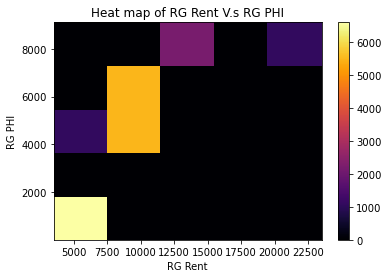

In [120]:
plt.hist2d(x=PHI_values_RG,y=rent_prices_RG,cmap='inferno',bins=5)
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.title('Heat map of RG Rent V.s RG PHI')
plt.colorbar()
plt.show()

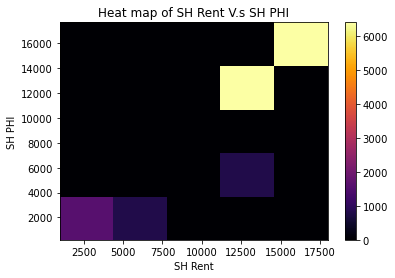

In [121]:
plt.hist2d(x=PHI_values_SH,y=rent_prices_SH,cmap='inferno',bins=5)
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.title('Heat map of SH Rent V.s SH PHI')
plt.colorbar()
plt.show()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

## Initial info

In [122]:
k = 100
n = 20
p = [0.2,0.1,0.1,0.1,0.2,0.3]

## generate expirements 

In [123]:
# generate k experiments with 6 rv, which the sum of expirement is n  
experiments_vector = np.random.multinomial(n=n, pvals=p, size=k)

# display the expirement results

In [163]:
df = pd.DataFrame(experiments_vector, columns=['X1','X2','X3','X4','X5','X6'])
print('The following table display our expirements result\neach row is single expirement which the sampels needs to be sun to 20')
print('The following table display our expirements result\neach row is single expirement')
print(df.to_markdown())


The following table display our expirements result
each row is single expirement which the sampels needs to be sun to 20
The following table display our expirements result
each row is single expirement
|    |   X1 |   X2 |   X3 |   X4 |   X5 |   X6 |
|---:|-----:|-----:|-----:|-----:|-----:|-----:|
|  0 |    4 |    3 |    2 |    2 |    3 |    6 |
|  1 |    5 |    2 |    3 |    4 |    2 |    4 |
|  2 |    5 |    2 |    2 |    4 |    1 |    6 |
|  3 |    2 |    0 |    4 |    3 |    6 |    5 |
|  4 |    8 |    2 |    1 |    2 |    1 |    6 |
|  5 |    5 |    1 |    4 |    2 |    3 |    5 |
|  6 |    3 |    3 |    2 |    2 |    1 |    9 |
|  7 |    4 |    2 |    2 |    4 |    4 |    4 |
|  8 |    3 |    2 |    3 |    0 |    6 |    6 |
|  9 |    5 |    1 |    1 |    1 |    4 |    8 |
| 10 |    4 |    2 |    5 |    0 |    2 |    7 |
| 11 |    2 |    3 |    1 |    2 |    4 |    8 |
| 12 |    2 |    1 |    3 |    1 |    4 |    9 |
| 13 |    3 |    3 |    0 |    4 |    2 |    8 |
| 14 |    8 | 

## Set Y

In [125]:
# suming the desire sampels
df['Y'] = df['X2'] + df['X3'] + df['X4']
Y = df['Y'].tolist()

##  Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments

In [164]:
result = moment(Y, moment=3)
print('the empirical centralized third moment of Y is ' + str(np.round(result,3)))

the empirical centralized third moment of Y is -0.065


## Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

* we know from the lecture that:
$$\gamma_3 = np*(1-p)(1-2p)=20*0.1(1-0.3)(1-2*0.3)=1.44$$
# * and in our case:
        * p = 0.3 (because 0.1 + 0.1 + 0.1)
        * n = 20

In [127]:
new_p = 0.1+0.1+0.1
gamma_3 = n*new_p*(1-new_p)*(1-2*new_p)
print(gamma_3)

1.6799999999999997


note that this result is constant while the empirical result changes due to the random state.

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

### * Q -  variance of the sum X +Y + Z:
  
$$ Var(X+Y+Z) = Var(X + (Y+Z)) = Var(X)+ 2Cov(X,Y+Z) + Var(Y+Z) $$
$$ Var(X+Y+Z) = Var(X)+ 2[Cov(X,Y)+Cov(X,Z)] + Var(Y)+2Cov(Y,Z) +Var(Z)$$


### * If X,Y,Z are pairwise independent, are they necessarily collectively independent? yes, proof:

    * Cov(X,Y) = 0
    * Cov(X,Z) = 0
    * Cov(Y,Z) = 0
    
$$Var(X+Y+Z) = Var(X)+ 0 + Var(Y)+0 +Var(Z)$$

$$Var(X+Y+Z) = Var(X)+Var(Y)+Var(Z)$$

# this of course practically means that they are independent.


### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [128]:
def NFoldConv(P , n):
    max_value_of_sum = max(list(P.keys())) * n
    min_value_of_sum = min(list(P.keys())) * n
    
    assert(sum(P.values()) == 1)  # assert that P is a valid distribution

    original = list(P.values())
    current_row = list(P.values())

    for _ in range(n-1):   # n-1 convolution actions
        current_row = np.convolve(current_row, original, mode='full')
    
    output = dict()
    keys = list(np.arange(min_value_of_sum, max_value_of_sum+1))
    for key, value in zip(keys, current_row):
        output[key] = value
    return output

A note about the solution above: this works because convolution is commutative and asociative !

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [162]:
P = {1:1/8, 2:1/8, 3:1/8, 4:1/8, 5:1/8, 6:1/8, 7:1/8, 8:1/8}
n = 17  
result = NFoldConv(P, n)
#esult_df = pd.DataFrame(result.item)
result_df = pd.DataFrame.from_dict(result,orient='index')
result_df = result_df.rename(columns={0: "Sum probability"})
print(result_df.to_markdown())

|     |   Sum probability |
|----:|------------------:|
|  17 |       4.44089e-16 |
|  18 |       7.54952e-15 |
|  19 |       6.79456e-14 |
|  20 |       4.30322e-13 |
|  21 |       2.15161e-12 |
|  22 |       9.03677e-12 |
|  23 |       3.31348e-11 |
|  24 |       1.08872e-10 |
|  25 |       3.26607e-10 |
|  26 |       9.07135e-10 |
|  27 |       2.35773e-09 |
|  28 |       5.78267e-09 |
|  29 |       1.34734e-08 |
|  30 |       2.9984e-08  |
|  31 |       6.40173e-08 |
|  32 |       1.31616e-07 |
|  33 |       2.61381e-07 |
|  34 |       5.02742e-07 |
|  35 |       9.38664e-07 |
|  36 |       1.7046e-06  |
|  37 |       3.01597e-06 |
|  38 |       5.20688e-06 |
|  39 |       8.78317e-06 |
|  40 |       1.4493e-05  |
|  41 |       2.34185e-05 |
|  42 |       3.70902e-05 |
|  43 |       5.76271e-05 |
|  44 |       8.79012e-05 |
|  45 |       0.000131724 |
|  46 |       0.000194047 |
|  47 |       0.000281171 |
|  48 |       0.000400945 |
|  49 |       0.000562932 |
|  50 |       0.0007